# Customer Segmentation

## Importing Directories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy.random import normal
%matplotlib inline
sns.set()

## Importing DataSet

In [2]:
train=pd.read_csv('train.csv',index_col=[0])
test=pd.read_csv('test.csv')

## Data Exploration

In [3]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


In [4]:
train.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [5]:
train.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
train['Ever_Married'].fillna(method='ffill',inplace=True)
train['Profession'].fillna(method='ffill',inplace=True)
train['Graduated'].fillna(method='bfill',inplace=True)
train['Work_Experience'].fillna(method='bfill',inplace=True)
train['Family_Size'].fillna(method='bfill',inplace=True)

In [7]:
train.isna().sum()

Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Work_Experience     0
Spending_Score      0
Family_Size         0
Var_1              76
Segmentation        0
dtype: int64

## Data Preprocessing

In [8]:
train1=train.drop(['Var_1','Segmentation'],axis=1)
train1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0
462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0
...,...,...,...,...,...,...,...,...
464018,Male,No,22,No,Artist,0.0,Low,7.0
464685,Male,No,35,No,Executive,3.0,Low,4.0
465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0


In [9]:
train1.groupby('Gender').mean()

,Age,Work_Experience,Family_Size
Gender,,,
Female,42.911531,2.810463,2.758422
Male,43.925968,2.459814,2.927553


In [10]:
train1.groupby('Ever_Married').mean()

,Age,Work_Experience,Family_Size
Ever_Married,,,
No,32.377764,2.953078,2.990436
Yes,51.324651,2.381406,2.752224


In [11]:
train1.groupby('Profession').mean()

,Age,Work_Experience,Family_Size
Profession,,,
Artist,46.189432,2.701761,2.523288
Doctor,37.311522,2.621622,2.880512
Engineer,41.762784,2.562500,2.974432
Entertainment,43.056075,2.686397,2.785047
Executive,51.089256,2.305785,3.418182
Healthcare,27.038433,2.557280,3.637103
Homemaker,38.244000,5.952000,2.316000
Lawyer,74.630503,1.391509,1.992138
Marketing,37.006689,2.545151,3.073579


In [12]:
train1.groupby('Spending_Score').mean()

,Age,Work_Experience,Family_Size
Spending_Score,,,
Average,46.868288,2.513171,3.102330
High,57.777138,2.162007,2.989309
Low,38.523165,2.774908,2.714842


In [13]:
train1['Gender']=train1['Gender'].map({'Female':0,'Male':1})
train1['Ever_Married']=train1['Ever_Married'].map({'No':0,'Yes':1})
train1['Graduated']=train1['Graduated'].map({'No':0,'Yes':1})
train1['Profession']=train1['Profession'].map({'Artist':0, 'Doctor':1, 'Engineer':2,'Entertainment':3,'Executive':4,'Healthcare':5,'Homemaker':6,'Lawyer':7, 'Marketing':8})
train1['Spending_Score']=train1['Spending_Score'].map({'Low':0,'Average':1,'High':2})

In [14]:
 train1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
ID,,,,,,,,
462809,1,0,22,0,5,1.0,0,4.0
462643,0,1,38,1,2,1.0,1,3.0
466315,0,1,67,1,2,1.0,0,1.0
461735,1,1,67,1,7,0.0,2,2.0
462669,0,1,40,1,3,0.0,2,6.0
...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0.0,0,7.0
464685,1,0,35,0,4,3.0,0,4.0
465406,0,0,33,1,5,1.0,0,1.0


## Exploratory Data Analysis

C:\Users\YESH\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


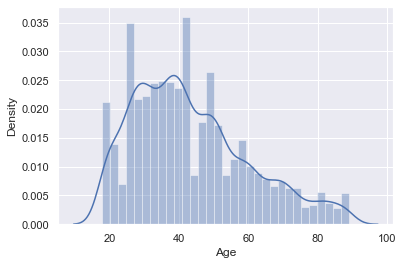

In [15]:
sns_plot=sns.distplot(train1['Age'])

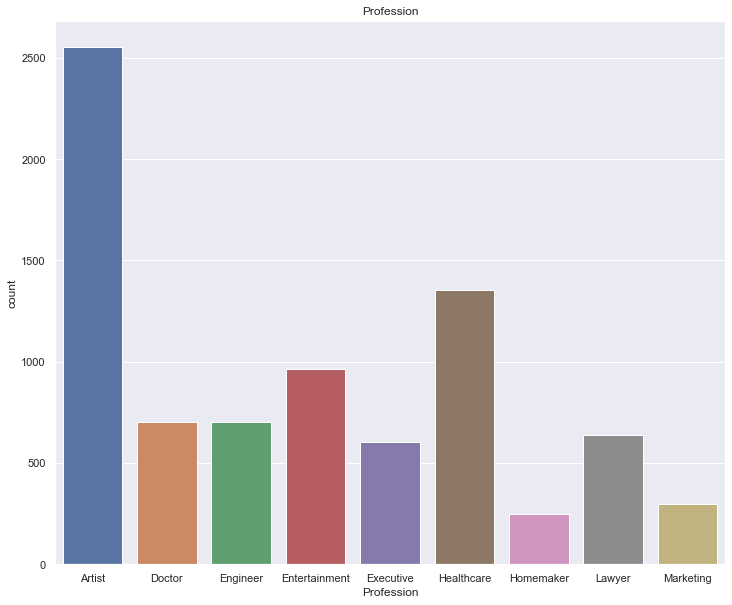

In [16]:
fig, ax = plt.subplots(figsize = (12,10))
sns.countplot(x = train1.Profession, data=train)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0]='Artist'
labels[1]='Doctor'
labels[2]='Engineer'
labels[3]='Entertainment'
labels[4]='Executive'
labels[5]='Healthcare'
labels[6]='Homemaker'
labels[7]='Lawyer'
labels[8]='Marketing'
ax.set_xticklabels(labels)
ax.set_title("Profession")
plt.show()

<AxesSubplot:ylabel='Density'>

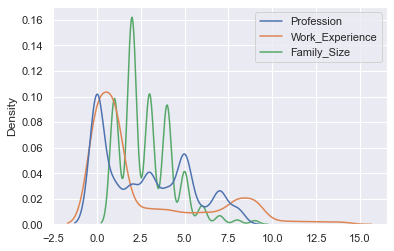

In [17]:
sns.kdeplot(data=train1.drop(['Age','Gender','Graduated','Ever_Married','Spending_Score'],axis=1))

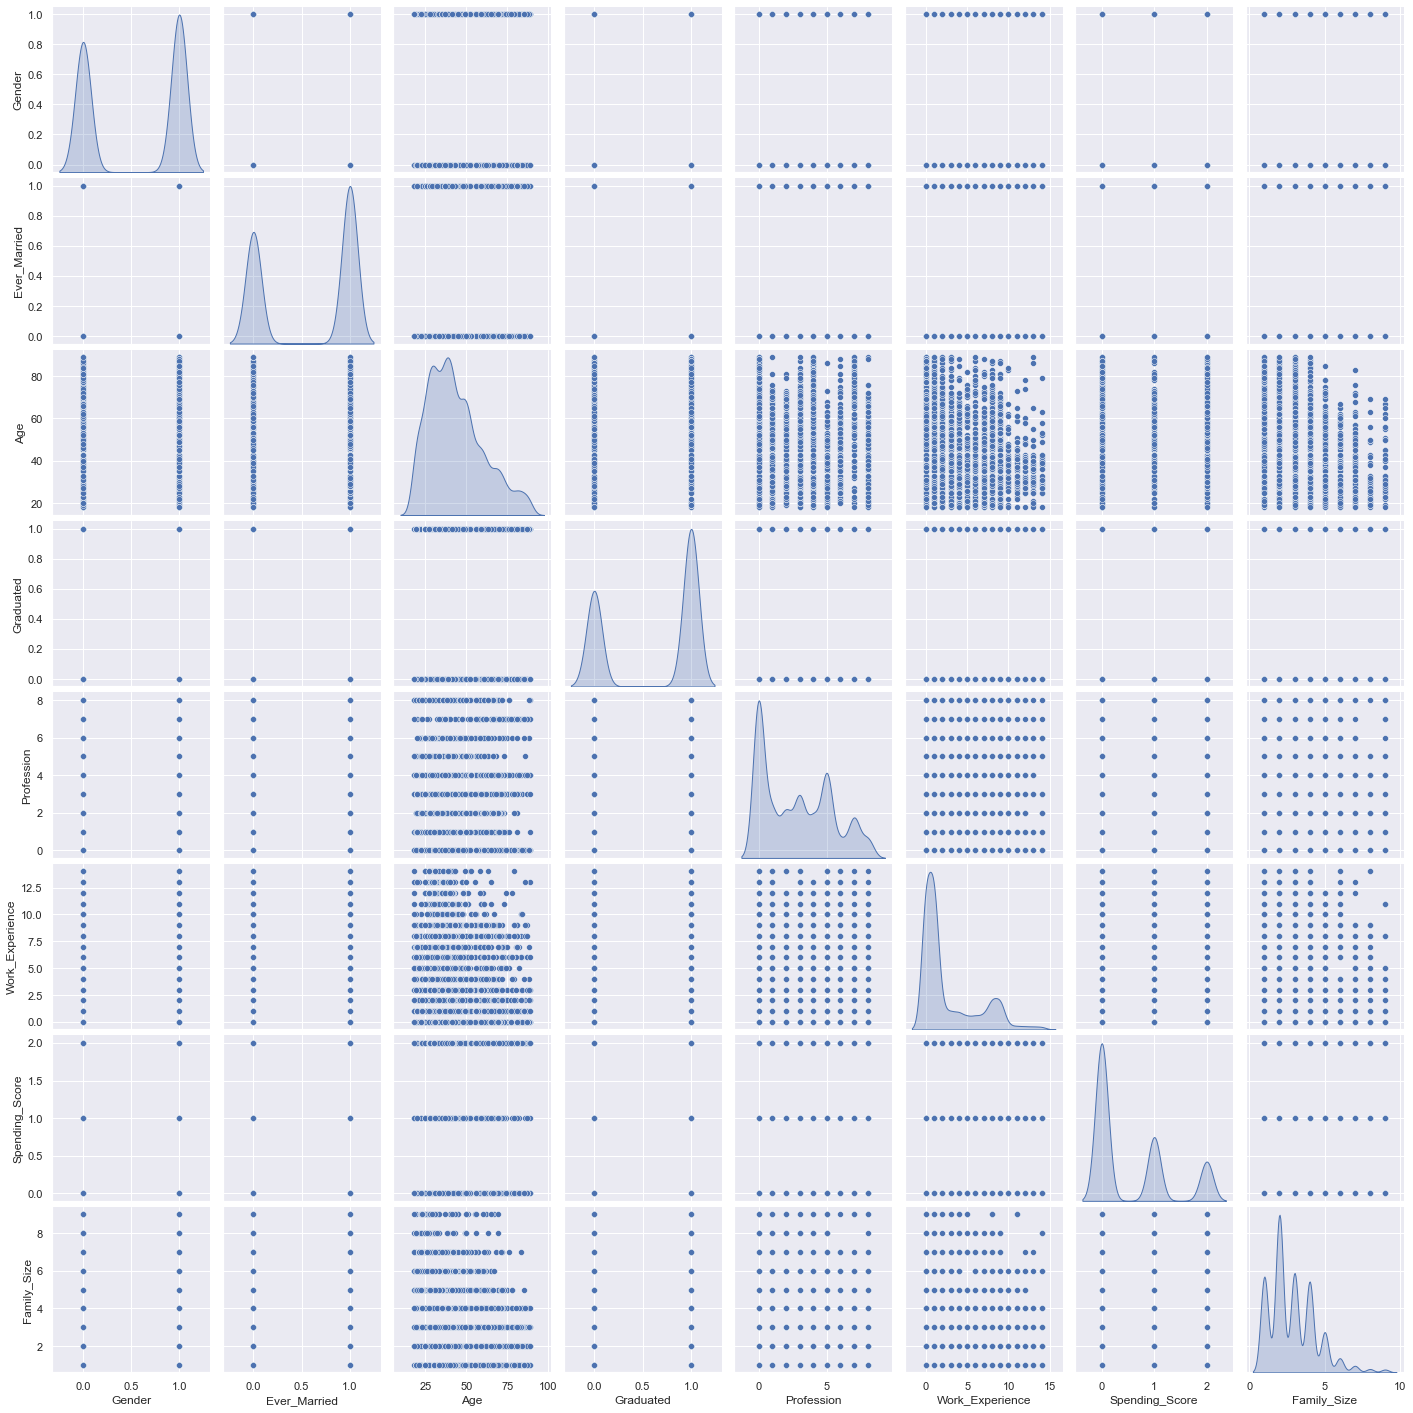

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = train1.iloc[:, 0:8]
sns.pairplot(cData_attr, diag_kind='kde')  

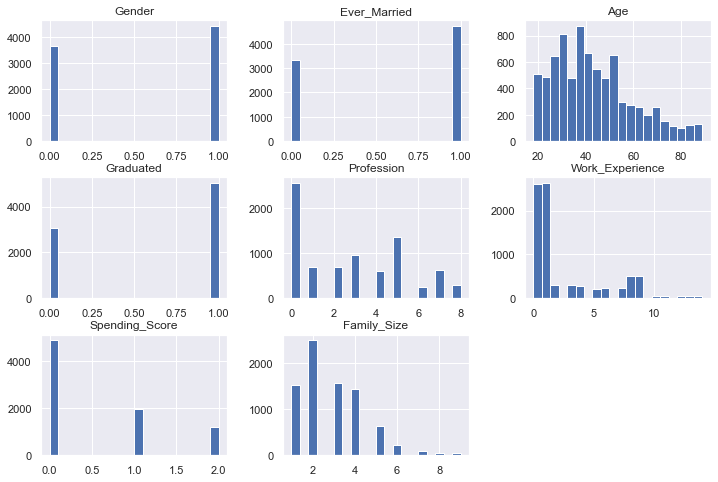

In [19]:
train1.hist(figsize=(12,8),bins=20)
plt.show()

In [20]:
train1.corr().round(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,1.000,0.114,0.030,-0.034,0.025,-0.052,0.061,0.055
Ever_Married,0.114,1.000,0.559,0.194,-0.135,-0.083,0.601,-0.077
Age,0.030,0.559,1.000,0.234,0.043,-0.167,0.415,-0.269
Graduated,-0.034,0.194,0.234,1.000,-0.291,0.039,0.102,-0.225
Profession,0.025,-0.135,0.043,-0.291,1.000,-0.024,0.011,0.083
Work_Experience,-0.052,-0.083,-0.167,0.039,-0.024,1.000,-0.065,-0.061
Spending_Score,0.061,0.601,0.415,0.102,0.011,-0.065,1.000,0.091
Family_Size,0.055,-0.077,-0.269,-0.225,0.083,-0.061,0.091,1.000


<AxesSubplot:title={'center':'Correlation Map'}>

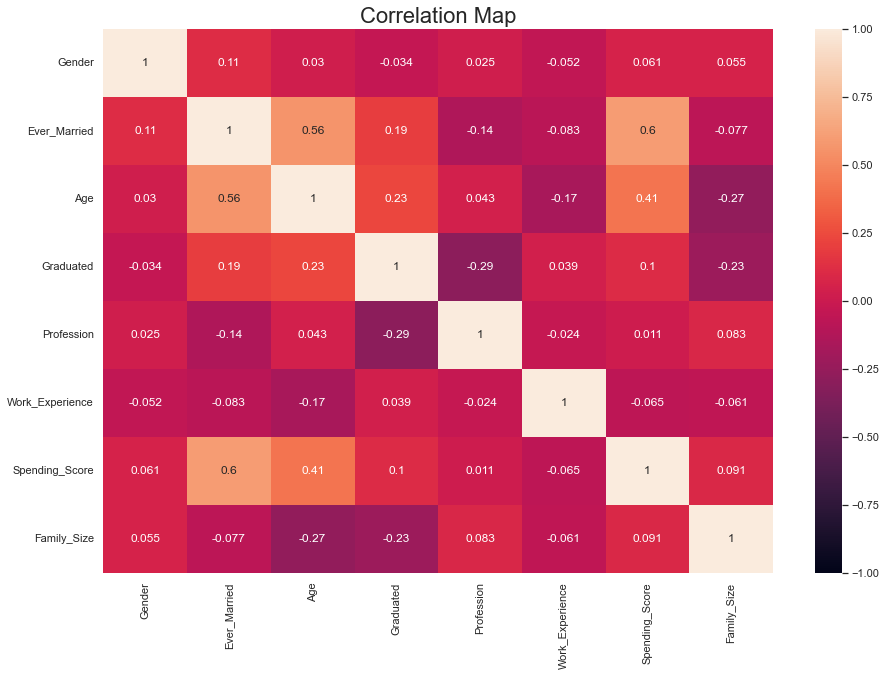

In [21]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title("Correlation Map",fontsize=22)
sns.heatmap(train1.corr().round(3),vmin=-1,vmax=1,annot=True)

## Standard Scaling

In [22]:
std=StandardScaler()
std.fit(train1)
std.transform(train1)

array([[ 0.90916397, -1.18795509, -1.28462344, ..., -0.4784402 ,
        -0.7368331 ,  0.75103849],
       [-1.0999116 ,  0.84178266, -0.32715082, ..., -0.4784402 ,
         0.61241099,  0.09738385],
       [-1.0999116 ,  0.84178266,  1.40826831, ..., -0.4784402 ,
        -0.7368331 , -1.20992543],
       ...,
       [-1.0999116 , -1.18795509, -0.62636101, ..., -0.4784402 ,
        -0.7368331 , -1.20992543],
       [-1.0999116 , -1.18795509, -0.98541324, ..., -0.4784402 ,
        -0.7368331 ,  0.75103849],
       [ 0.90916397,  0.84178266, -0.38699286, ..., -0.77404868,
         0.61241099,  0.09738385]])

### Variance Inflation Factor

In [23]:
X = train1[['Gender','Ever_Married','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']]  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0           Gender  2.120178
1     Ever_Married  3.648348
2        Graduated  2.249641
3       Profession  1.965733
4  Work_Experience  1.497853
5   Spending_Score  2.477384
6      Family_Size  2.969025


# Clustering

## Hierarchical

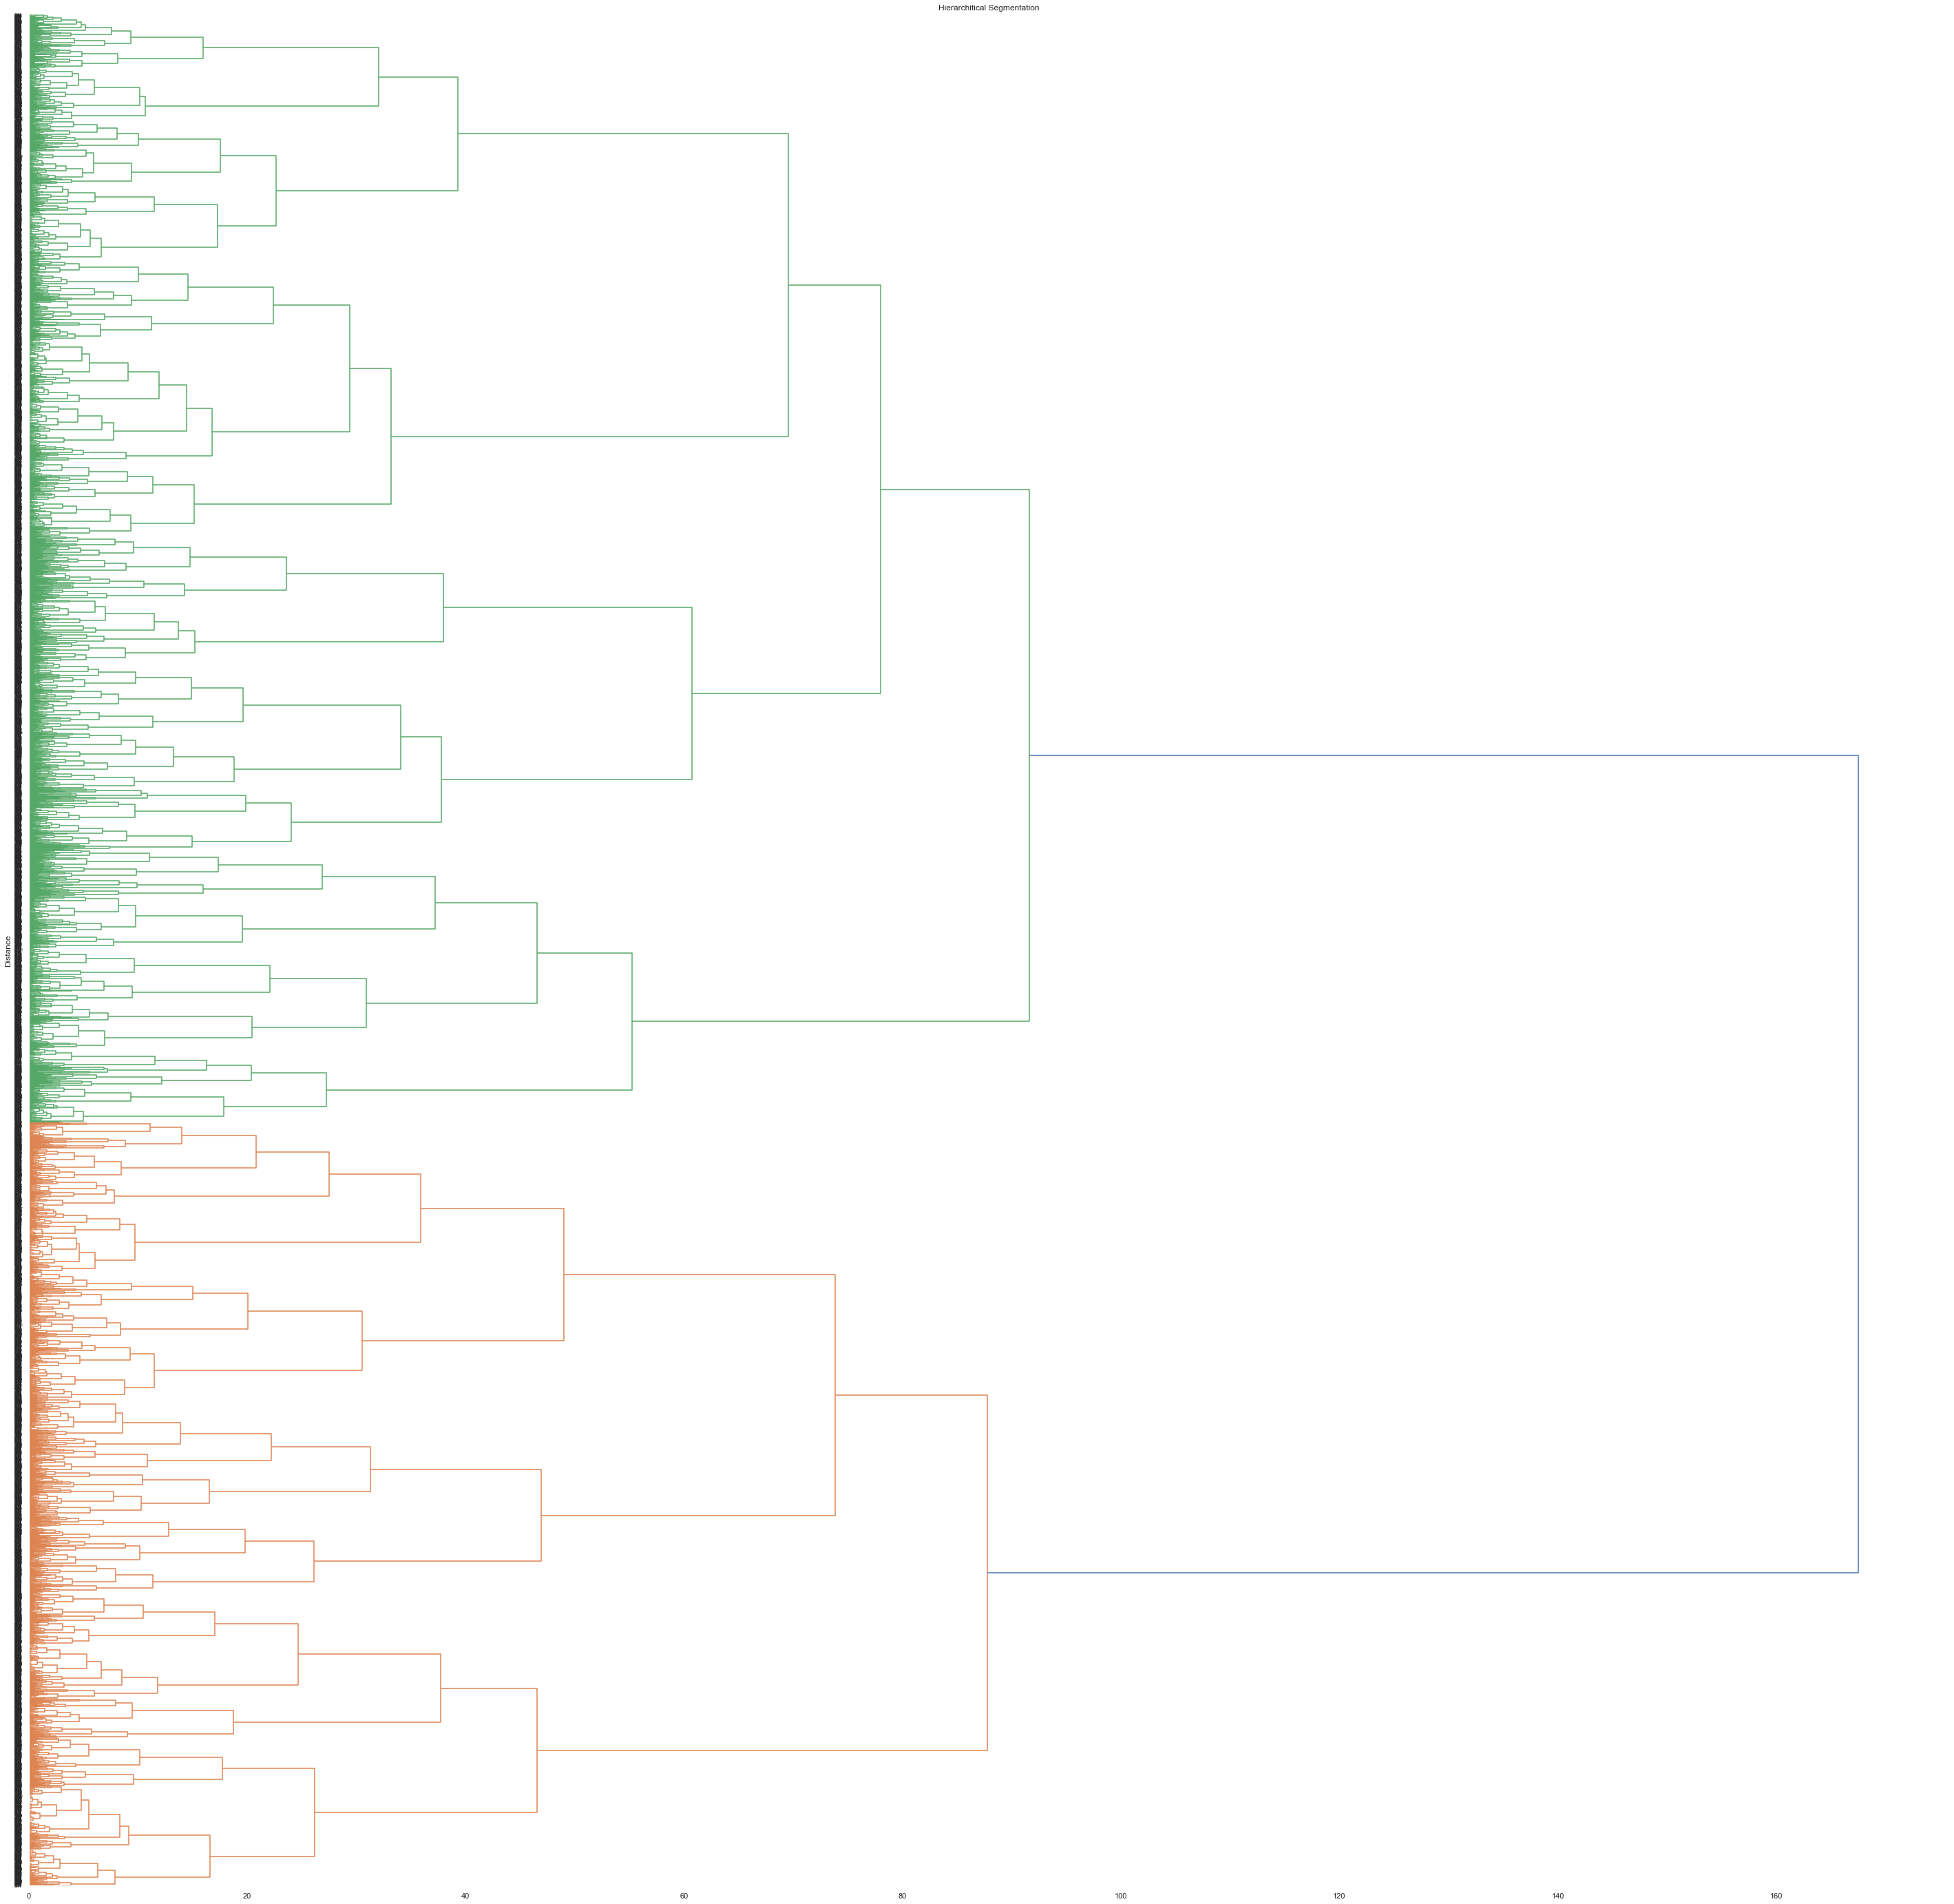

In [24]:
link=linkage(std.transform(train1),'ward')
plt.figure(figsize=(50,50))
dendrogram(link,p=5,orientation='right')
plt.ylabel('Distance')
plt.title('Hierarchitical Segmentation')
plt.show()

## K Means Clustering

In [25]:
train1[['Work_Experience','Family_Size']]=train1[['Work_Experience','Family_Size']].astype('int32')

In [26]:
std=StandardScaler()
std.fit_transform(train1)

array([[ 0.90916397, -1.18795509, -1.28462344, ..., -0.4784402 ,
        -0.7368331 ,  0.75103849],
       [-1.0999116 ,  0.84178266, -0.32715082, ..., -0.4784402 ,
         0.61241099,  0.09738385],
       [-1.0999116 ,  0.84178266,  1.40826831, ..., -0.4784402 ,
        -0.7368331 , -1.20992543],
       ...,
       [-1.0999116 , -1.18795509, -0.62636101, ..., -0.4784402 ,
        -0.7368331 , -1.20992543],
       [-1.0999116 , -1.18795509, -0.98541324, ..., -0.4784402 ,
        -0.7368331 ,  0.75103849],
       [ 0.90916397,  0.84178266, -0.38699286, ..., -0.77404868,
         0.61241099,  0.09738385]])

In [27]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans=kmeans.fit(std.fit_transform(train1))
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'Segmentation Range')

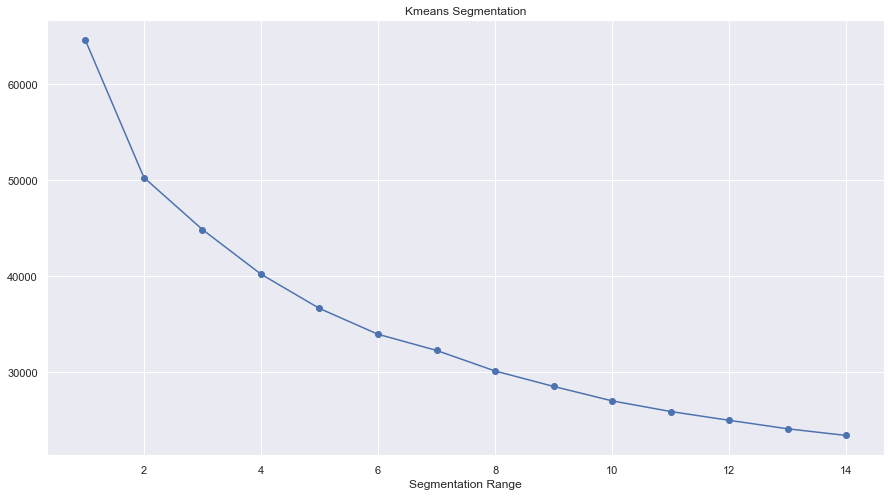

In [28]:
plt.figure(figsize=(15,8))
plt.plot(range(1,15),wcss,marker='o')
plt.title('Kmeans Segmentation')
plt.xlabel('Segmentation Range')

C:\Users\YESH\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


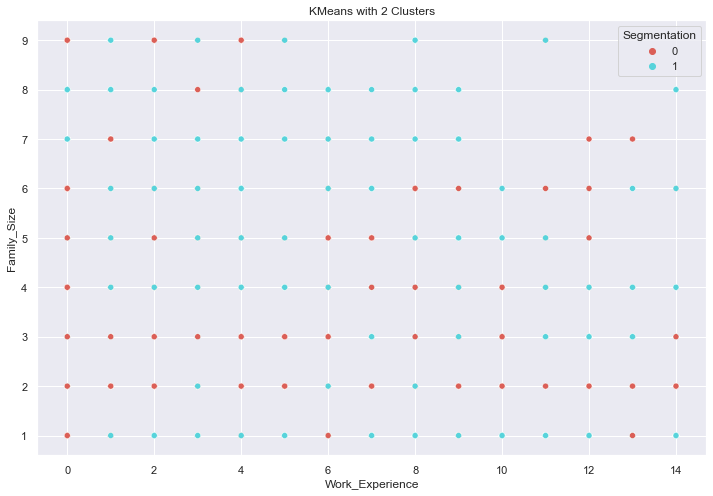

In [29]:
# 2 cluster
km2 = KMeans(n_clusters=2).fit(train1)
km2.fit(std.fit_transform(train1))
kmeans_seg3=pd.DataFrame(train1)
kmeans_seg3["Segmentation"]=km2.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(kmeans_seg3['Work_Experience'], kmeans_seg3['Family_Size'], hue=kmeans_seg3['Segmentation'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()

C:\Users\YESH\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


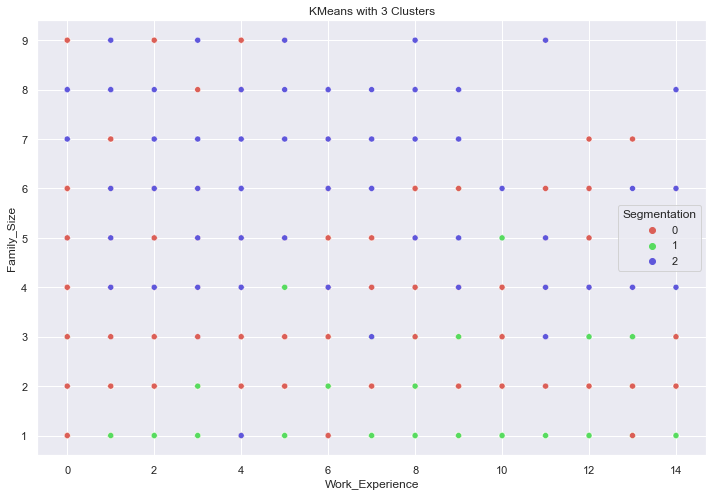

In [30]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(train1)
km3.fit(std.fit_transform(train1))
kmeans_seg1=pd.DataFrame(train1)
kmeans_seg1["Segmentation"]=km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(kmeans_seg1['Work_Experience'], kmeans_seg1['Family_Size'], hue=kmeans_seg1['Segmentation'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

C:\Users\YESH\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


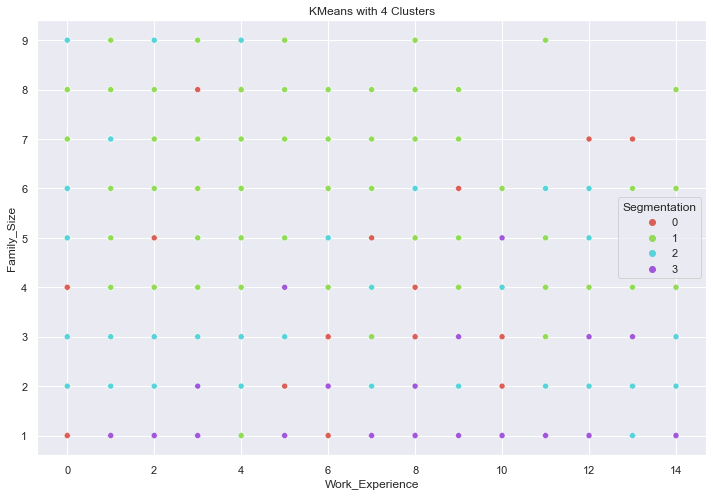

In [31]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(train1)
km4.fit(std.fit_transform(train1))
kmeans_seg2=pd.DataFrame(train1)
kmeans_seg2["Segmentation"]=km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(kmeans_seg2['Work_Experience'], kmeans_seg2['Family_Size'], hue=kmeans_seg2['Segmentation'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=4,random_state=40)
kmeans.fit(std.fit_transform(train1))
kmeans.labels_

array([0, 2, 2, ..., 3, 0, 2])

In [33]:
kmeans_seg=pd.DataFrame(train1)
kmeans_seg["Segmentation"]=kmeans.labels_
kmeans_seg

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
ID,,,,,,,,,
462809,1,0,22,0,5,1,0,4,0
462643,0,1,38,1,2,1,1,3,2
466315,0,1,67,1,2,1,0,1,2
461735,1,1,67,1,7,0,2,2,1
462669,0,1,40,1,3,0,2,6,2
...,...,...,...,...,...,...,...,...,...
464018,1,0,22,0,0,0,0,7,0
464685,1,0,35,0,4,3,0,4,0
465406,0,0,33,1,5,1,0,1,3


In [34]:
kmeans_seg_grp=kmeans_seg.groupby('Segmentation').mean().round(3)
kmeans_seg_grp

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Segmentation,,,,,,,,
0,0.539,0.064,26.602,0.128,4.298,2.398,0.027,4.079
1,0.703,0.985,62.311,0.527,5.295,1.907,1.308,2.729
2,0.545,0.998,46.708,0.815,1.004,2.560,0.750,2.703
3,0.413,0.011,37.762,0.895,2.048,3.644,0.005,1.913


In [35]:
kmeans_seg_grp.rename({0:'Average',1:'Low',2:'Work & Spend',3:'Good Profeesion'},inplace=True)
kmeans_seg_grp

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Segmentation,,,,,,,,
Average,0.539,0.064,26.602,0.128,4.298,2.398,0.027,4.079
Low,0.703,0.985,62.311,0.527,5.295,1.907,1.308,2.729
Work & Spend,0.545,0.998,46.708,0.815,1.004,2.560,0.750,2.703
Good Profeesion,0.413,0.011,37.762,0.895,2.048,3.644,0.005,1.913


## PCA

In [36]:
pca=PCA()
pca.fit(std.fit_transform(train1))
pca.explained_variance_ratio_.cumsum()

array([0.26778438, 0.4792234 , 0.59520527, 0.70390375, 0.80908075,
       0.88282286, 0.93159486, 0.97019434, 1.        ])

Text(0.5, 0, 'Clustering Range')

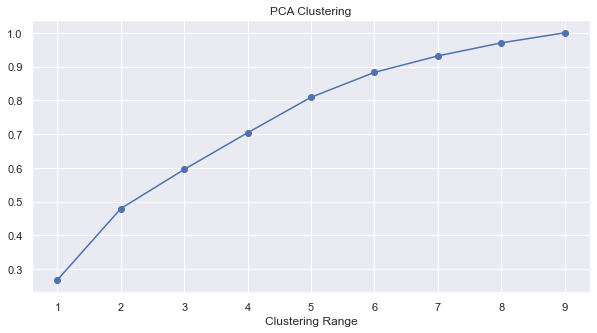

In [37]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title('PCA Clustering')
plt.xlabel("Clustering Range")

In [38]:
pca=PCA(n_components=4)
pca.fit(std.fit_transform(train1))
pca.components_

array([[ 0.00136428, -0.42457856, -0.42753168, -0.43343539,  0.28167199,
         0.02157875, -0.30562843,  0.30462911, -0.42786591],
       [ 0.19212204,  0.40576761,  0.32273388, -0.24091456,  0.31443715,
        -0.23980879,  0.47010736,  0.25165907, -0.44219067],
       [ 0.42363878,  0.11518656, -0.33833033,  0.1141534 , -0.56290703,
         0.06415096,  0.15693661,  0.57663488,  0.04058669],
       [-0.45627813,  0.14214562, -0.06647097, -0.03429099,  0.07328119,
         0.7947946 ,  0.30877268,  0.177035  , -0.04754026]])

In [39]:
train1.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

In [40]:
pca_seg=pd.DataFrame(pca.components_,index=['comp 1','comp 2','comp 3','comp 4'],columns=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Segmentation']).round(3)
pca_seg

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
comp 1,0.001,-0.425,-0.428,-0.433,0.282,0.022,-0.306,0.305,-0.428
comp 2,0.192,0.406,0.323,-0.241,0.314,-0.240,0.470,0.252,-0.442
comp 3,0.424,0.115,-0.338,0.114,-0.563,0.064,0.157,0.577,0.041
comp 4,-0.456,0.142,-0.066,-0.034,0.073,0.795,0.309,0.177,-0.048


Text(0.5, 1.0, 'Component Map')

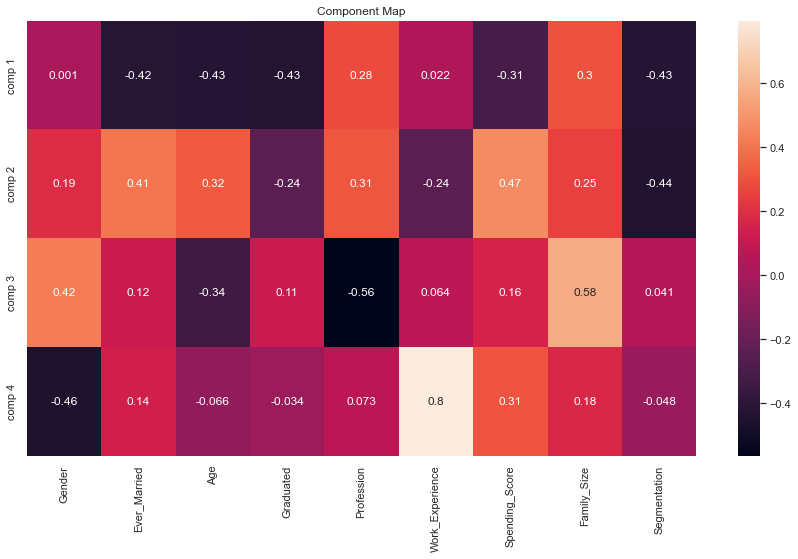

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(pca_seg,annot=True)
plt.title('Component Map')